# Coronavirus Simulation

## Initialization

Import the required libraries.

In [63]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
from modsim import *
import random
import statistics
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

np.random.seed(7)

Initialize the coronavirus state object

In [64]:
coronavirus = State(dead=0, recovered=0, infected=1, not_infected=0, total=0)

,values
dead,0
recovered,0
infected,1
not_infected,0
total,0


Initialize the TimeSeries objects

In [65]:
not_infected = TimeSeries()
infected = TimeSeries()
dead = TimeSeries()
recovered = TimeSeries()

,values


## Declaration

Declare the infect function.

In [66]:
def infect(infect_prob):
    if coronavirus.total > 0:
        if flip(infect_prob):
            coronavirus.infected += 1
            coronavirus.not_infected -= 1
        coronavirus.total -= 1

Declare the infect_step function.

In [67]:
def infected_step():
    death_prob = 0.0007
    recover_prob = 0.3
    if flip(death_prob):
        coronavirus.dead += 1
        coronavirus.infected -= 1
    else:
        if flip(recover_prob):
            coronavirus.recovered += 1
            coronavirus.not_infected += 1
            coronavirus.infected -= 1

Declare the day_pass function.

In [68]:
def day_pass(infectable_persons, infect_prob, day):
    for i in range(infectable_persons):
        infect(infect_prob)
    if (day >= 5):
        if coronavirus.infected > 1:
            rangeNumber = int(coronavirus.infected * random.random())
            for i in range(rangeNumber):
                infected_step()

Declare the draw function.

In [69]:
def draw():
    fig = plt.figure(figsize=(30,10))
    
    plt.subplot2grid((2,3),(0,0))
    orange_line = mlines.Line2D([], [], color='orange', label='Infected')
    blue_line = mlines.Line2D([], [], color='blue', label='Not infected')
    red_line = mlines.Line2D([], [], color='red', label='Dead')
    green_line = mlines.Line2D([], [], color='green', label='Recovered')
    plt.legend(handles=[orange_line, blue_line, red_line, green_line], loc='upper right')
    plt.plot(infected, color='orange')
    plt.plot(not_infected, color='blue')
    plt.plot(dead, color='red')
    plt.plot(recovered, color='green')
    plt.title('Coronavirus status per day')
    plt.xlabel('Time step (day)') 
    plt.ylabel('Number of persons')
    savefig('figs/chap02-fig01.pdf')
    
    
    plt.subplot2grid((2,3),(0,1))
    orange_line = mlines.Line2D([], [], color='orange', label='Infected')
    blue_line = mlines.Line2D([], [], color='blue', label='Not infected')
    red_line = mlines.Line2D([], [], color='red', label='Dead')
    green_line = mlines.Line2D([], [], color='green', label='Recovered')
    plt.legend(handles=[orange_line, blue_line, red_line, green_line], loc='upper center')
    plt.scatter(infected, infected, color='orange')
    plt.scatter(not_infected, not_infected, color='blue')
    plt.scatter(dead, dead, color='red')
    plt.scatter(recovered, recovered, color='green')
    plt.title('Population Data Dispersion')
    plt.xlabel('Persons')
    plt.ylabel('Persons')
    savefig('figs/chap02-fig02.pdf')

Declare the run simulation function.

In [70]:
def run_simulation(population, infect_prob, relations_per_day):
    coronavirus.total = population
    infectable_persons = relations_per_day
    coronavirus.not_infected = population
    
    pStandardDev = statistics.pstdev([population, infect_prob, relations_per_day])
    standardDev = 'Desviación: ' + repr(pStandardDev)
    print(standardDev)

    day = 1
    while True:
        day_pass(infectable_persons, infect_prob, day)
        infected[day] = coronavirus.infected
        dead[day] = coronavirus.dead
        recovered[day] = coronavirus.recovered
        not_infected[day] = coronavirus.not_infected
        
        
        print('day: ' + str(day) + ', infected: ' + str(coronavirus.infected) + ', dead: ' + str(coronavirus.dead) + ', recovered: ' + str(coronavirus.recovered))
        day += 1
        
        infectable_persons = relations_per_day * coronavirus.infected
        if (coronavirus.infected <= 1):
            break
    draw()

# Run simulation

Run simulation with run_simulation(population, prob, relations). Parameters:
- Population: Quantity of people that can be reached
- Prob: probability of infection
- Relations: Quantity of people that a person meets per day

### No quarantine

Desviación: 47137.936111198935
day: 1, infected: 8, dead: 0, recovered: 0
day: 2, infected: 63, dead: 0, recovered: 0
day: 3, infected: 488, dead: 0, recovered: 0
day: 4, infected: 3796, dead: 0, recovered: 0
day: 5, infected: 21501, dead: 19, recovered: 7844
day: 6, infected: 44958, dead: 50, recovered: 22335
day: 7, infected: 36404, dead: 60, recovered: 30879
day: 8, infected: 35237, dead: 62, recovered: 32044
day: 9, infected: 24969, dead: 80, recovered: 42294
day: 10, infected: 19484, dead: 95, recovered: 47764
day: 11, infected: 17862, dead: 101, recovered: 49380
day: 12, infected: 14569, dead: 106, recovered: 52668
day: 13, infected: 11814, dead: 112, recovered: 55417
day: 14, infected: 10837, dead: 114, recovered: 56392
day: 15, infected: 8842, dead: 120, recovered: 58381
day: 16, infected: 8679, dead: 121, recovered: 58543
day: 17, infected: 8656, dead: 121, recovered: 58566
day: 18, infected: 6470, dead: 126, recovered: 60747
day: 19, infected: 5732, dead: 130, recovered: 6148

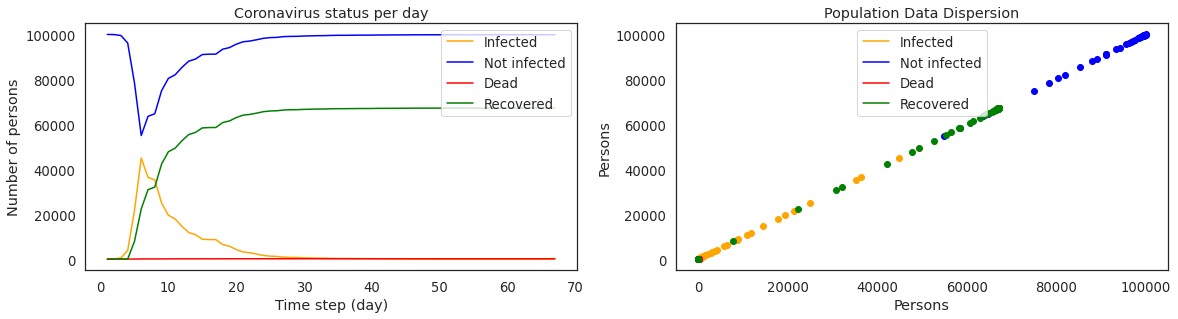

In [58]:
run_simulation(100000, 0.675, 10)

### With quarantine

Desviación: 47139.82157866019
day: 1, infected: 3, dead: 0, recovered: 0
day: 2, infected: 8, dead: 0, recovered: 0
day: 3, infected: 18, dead: 0, recovered: 0
day: 4, infected: 43, dead: 0, recovered: 0
day: 5, infected: 103, dead: 0, recovered: 0
day: 6, infected: 227, dead: 0, recovered: 16
day: 7, infected: 475, dead: 0, recovered: 76
day: 8, infected: 951, dead: 0, recovered: 239
day: 9, infected: 1525, dead: 0, recovered: 899
day: 10, infected: 2907, dead: 1, recovered: 1569
day: 11, infected: 6099, dead: 1, recovered: 2330
day: 12, infected: 11592, dead: 9, recovered: 5151
day: 13, infected: 20280, dead: 32, recovered: 12148
day: 14, infected: 44028, dead: 37, recovered: 15831
day: 15, infected: 41270, dead: 53, recovered: 26357
day: 16, infected: 39038, dead: 58, recovered: 28584
day: 17, infected: 31910, dead: 74, recovered: 35696
day: 18, infected: 24248, dead: 95, recovered: 43337
day: 19, infected: 20778, dead: 102, recovered: 46800
day: 20, infected: 15182, dead: 114, reco

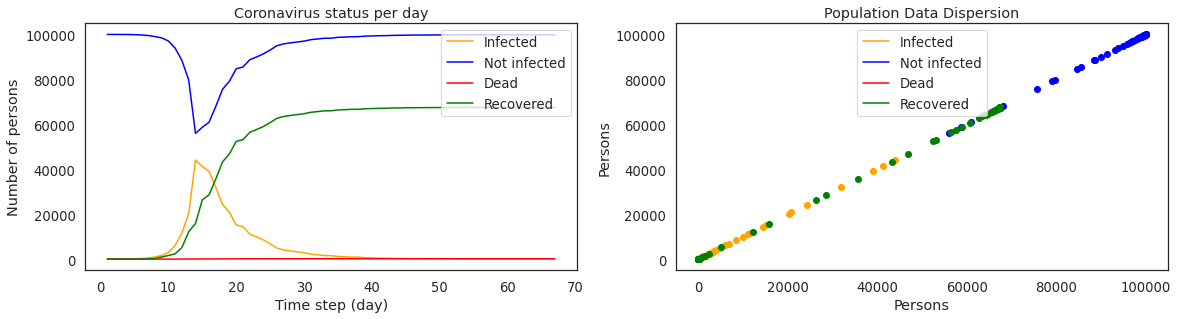

In [61]:
run_simulation(100000, 0.675, 2)